# Transfer learning gender classifier by using dlib face feature extractor

In [1]:
import os
import timeit
import cv2
from skimage import io as io
import face_recognition as fr
import numpy as np
import pickle
from tqdm import tqdm
from sklearn import datasets, svm, metrics
import random
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
with open('gender_data.pkl', 'rb') as f:
    gender_dataset_raw = pickle.load(f)

random.shuffle(gender_dataset_raw)

In [3]:
embedding_list_train = list()
gender_label_list_train = list()

embedding_list_test = list()
gender_label_list_test = list()

for emb, label in gender_dataset_raw[1:1200]:
    embedding_list_train.append(emb)
    gender_label_list_train.append(label)

for emb, label in gender_dataset_raw[1201:]:
    embedding_list_test.append(emb)
    gender_label_list_test.append(label)
    
print('length of embedding train list: {}'.format(len(embedding_list_train)))
print('lenght of label train list: {}'.format(len(gender_label_list_train)))
print('length of embedding test list: {}'.format(len(embedding_list_test)))
print('lenght of label test list: {}'.format(len(gender_label_list_test)))

length of embedding train list: 1199
lenght of label train list: 1199
length of embedding test list: 348
lenght of label test list: 348


In [4]:
classifier = svm.SVC(gamma='auto', kernel='rbf', C=20)
classifier.fit(embedding_list_train, gender_label_list_train)

expected = gender_label_list_test
predicted = classifier.predict(embedding_list_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          f       0.90      0.99      0.94       159
          m       0.99      0.91      0.95       189

avg / total       0.95      0.95      0.95       348


Confusion matrix:
[[157   2]
 [ 17 172]]


# Demo

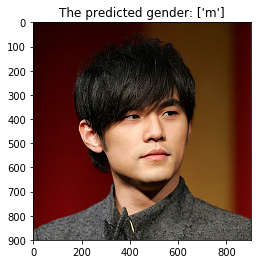

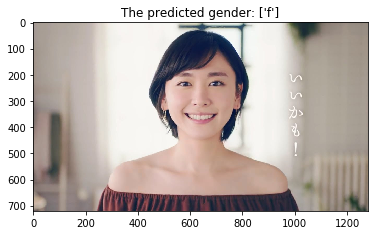

In [5]:
img1 = io.imread('test1.jpg')
img2 = io.imread('test2.jpg')

img1_enc = fr.face_encodings(img1)[0]
img2_enc = fr.face_encodings(img2)[0]

img1_predict = classifier.predict([img1_enc])
img2_predict = classifier.predict([img2_enc])

plt.title('The predicted gender: {}'.format(img1_predict))
plt.imshow(img1)
plt.show()

plt.title('The predicted gender: {}'.format(img2_predict))
plt.imshow(img2)
plt.show()